# Lista 2 - rozwiązania

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
from patsy import dmatrices
from sklearn import metrics

## Zadanie 9

W zadaniu 9 należało rozwiązać zadania numer 13 i 14 z ćwiczeń z regresji liniowej zamieszczonych w podanej książce.

### Zadanie 13

W zadaniu 13 mamy do czynienia z prostym modelem regresji liniowej (tylko jeden predyktor $x$ i dwa parametry do estymowania $\beta_{0}$ oraz $\beta_{1}$). W podpunkcie *a* należało utworzyć wektor **x** zawierający 100 obserwacji z rozkładu $N(0, 1)$. Ten wektor będzie reprezentował naszą cechę (predytkor) $X$.

In [3]:
x = np.random.normal(0, 1, size=100)

In [4]:
print(f'Wektor x: {x}')

Wektor x: [ 6.99504671e-02  2.37609623e-03  1.56017421e+00  1.16926342e+00
 -8.94968966e-02 -1.24225561e+00 -1.80105003e+00  1.28047906e+00
 -1.02924644e+00  3.91091363e-01 -8.82989829e-01 -1.16773071e+00
  3.78917118e-01  5.06770454e-01 -1.45287873e+00  5.78219370e-01
 -2.32872162e-01  2.61454688e-02  1.47538472e-01  1.20127416e-01
 -1.19469792e+00  3.24273151e-01  1.22587495e+00  4.70795851e-02
  1.06123686e+00  4.21970729e-01 -3.42346269e-01 -3.10182791e-01
  1.78192895e+00  1.76450108e+00 -1.20793907e+00  5.84145021e-01
 -3.21626798e-01 -8.01870538e-01 -3.79702735e-01  1.06552223e+00
 -2.03694609e+00  7.78844379e-02  7.44823808e-02 -1.17186146e+00
 -4.75586568e-02  9.18417502e-01  1.90318767e+00 -1.00517722e+00
 -1.21302602e-01 -2.21595682e-01  9.44619007e-01  7.10876250e-01
  1.67984695e+00  6.46357470e-01  1.36451155e+00 -5.80720449e-01
 -1.34539673e-01 -1.07373524e+00 -1.73059710e+00  1.69905790e-01
  1.69920982e+00 -1.88033777e-01  1.01579993e+00  1.09728405e+00
  2.34610213e-0

Następnie należało utworzyć wektor **eps** zawierający 100 próbek z rozkładu $N(0, 0.25)$:

In [5]:
eps = np.random.normal(0, 0.25, size=100)

In [6]:
print(f'Wektor eps: {eps}')

Wektor eps: [ 0.00441082 -0.19344105  0.06083829  0.03568798  0.21682338 -0.12035344
 -0.11436559 -0.00355919  0.27738926 -0.25858682  0.28965527  0.27448968
 -0.124761    0.15892649  0.18959554  0.16203521  0.22917204  0.22048081
  0.41187483 -0.17270208 -0.01909434  0.20175182  0.46595424  0.39248329
 -0.26606504 -0.01383649  0.04085841 -0.06158592 -0.21094535  0.18889698
  0.04852967 -0.04421342  0.2966404   0.08881336  0.16208621  0.16479816
 -0.39116818  0.12487311  0.06079933  0.17302956  0.51593204  0.21273649
  0.19296943 -0.17575534 -0.25210605  0.23368573 -0.02844831  0.43649163
  0.0385971   0.21187448  0.08114342 -0.03472364 -0.45637036 -0.05359796
 -0.39228904 -0.22865634 -0.06856859 -0.26181894  0.24196536  0.14410617
 -0.31264901 -0.52918614 -0.12071861 -0.17844424  0.28874503 -0.04153425
 -0.20305677 -0.27331805  0.33142562  0.10323474 -0.38775987  0.15200155
 -0.17114008  0.29049076  0.04311107  0.25229977 -0.26899529 -0.13540712
 -0.19398646  0.12147092 -0.25793762 -0

Po wygenerowaniu dwóch poprzednich wektorów, teraz trzeba utworzyć wektor y, który jest następującej postaci:
> $Y = -1 + 0.5 \cdot X + \epsilon$

Oczywiście długość tego wektora będzie taka sama jak długość wektora **x** oraz **eps** i będzie wynosiła 100. Wartości $\beta_{0} = -1$ i $\beta_{1} = 0.5$. Za wygenerowanie wektora **y** odpowiada poniższy kod:

In [7]:
y = np.array([-1 + 0.5*x[i] + eps[i] for i in range(x.size)])

In [8]:
print(f'Wektor y: {y}')

Wektor y: [-0.96061395 -1.192253   -0.15907461 -0.37968031 -0.82792507 -1.74148125
 -2.01489061 -0.36331966 -1.23723396 -1.06304113 -1.15183965 -1.30937567
 -0.93530244 -0.58768829 -1.53684382 -0.54885511 -0.88726404 -0.76644645
 -0.51435593 -1.11263837 -1.6164433  -0.6361116   0.07889171 -0.58397692
 -0.73544662 -0.80285112 -1.13031473 -1.21667731 -0.31998087  0.07114752
 -1.55543987 -0.75214091 -0.864173   -1.31212191 -1.02776515 -0.30244072
 -2.40964123 -0.83618467 -0.90195948 -1.41290117 -0.50784729 -0.32805476
  0.14456327 -1.67834395 -1.31275735 -0.87711211 -0.55613881 -0.20807025
 -0.12147943 -0.46494678 -0.2366008  -1.32508386 -1.5236402  -1.59046558
 -2.25758759 -1.14370345 -0.21896368 -1.35583583 -0.25013468 -0.3072518
 -1.1953439  -0.94149055 -1.07445428 -1.69225338 -0.07363233 -0.084779
 -1.39746893 -1.33504394 -0.62099249 -1.20331163 -1.56786422 -0.47204198
 -1.50452981 -1.0916956  -0.76999286 -0.85465954 -1.04519694 -0.72281356
 -1.54693106 -1.19377423 -1.27878164 -1.9934

Później należało narysować wykres przedstawiający relację między wartościami wektora **x** i wektora **y**:

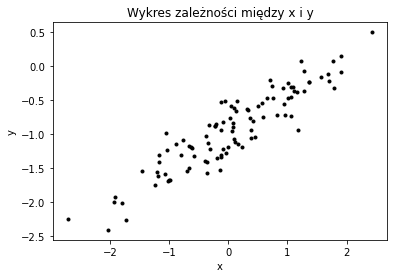

In [9]:
plt.title(f'Wykres zależności między x i y')
plt.xlabel(f'x')
plt.ylabel(f'y')

plt.plot(x, y, '.', color='black')

plt.show()

Obserwując otrzymany wykres można zauważyć, że wartości $X$ i $Y$ zależą od siebie liniowo (widać pewien liniowy wzór w tych danych). Ta własność wynika z zależności między wartościami $Y$ i $X$. Oczywiście te punkty zawsze będą rozrzucone wokół pewnej prostej, ze względu na obecność wartości **eps** (szumu) w omawianej zależności.

Następnie należało zastosować metodę najmniejszych kwadratów do dopasowania prostej (funkcji liniowej) do naszych danych (czyli przewidujemy wartości $Y$ na podstawie wartości $X$):

In [10]:
def my_lin_reg(response_vector, predictors_vector):
    model = sm.OLS(response_vector, predictors_vector)
    result = model.fit()
    
    return result

x_with_constant = sm.add_constant(x)

result = my_lin_reg(y, x_with_constant)
print(f'Podsumowanie regresji liniowej: {result.summary()}')
print(f'{result.params}')

Podsumowanie regresji liniowej:                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     511.9
Date:                Sat, 19 Nov 2022   Prob (F-statistic):           1.08e-40
Time:                        18:11:50   Log-Likelihood:                 5.1598
No. Observations:                 100   AIC:                            -6.320
Df Residuals:                      98   BIC:                            -1.109
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.964

Następnie należało narysować na otrzymanym wykresie danych funkcje liniowe ze współczynnikami $\hat{\beta_{0}}$ i $\hat{\beta_{1}}$ oraz ${\beta_{0}}$ i ${\beta_{1}}$.

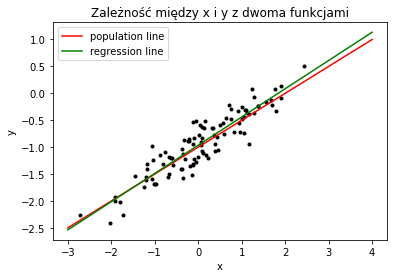

In [11]:
def draw_plot_with_two_lines(x, y, true_coefficients, estimated_coefficients):
    x1 = np.linspace(-3, 4, num=50)
    x2 = np.linspace(-3, 4, num=50)
    
    y1 = true_coefficients[1]*x1 + true_coefficients[0]
    y2 = estimated_coefficients[1]*x2 + estimated_coefficients[0]
    
    plt.title(f'Zależność między x i y z dwoma funkcjami')
    plt.ylabel(f'y')
    plt.xlabel(f'x')
    
    plt.plot(x, y, '.', color='black')
    plt.plot(x1, y1, linestyle='-', color='red', label=f'population line')
    plt.plot(x2, y2, linestyle='-', color='green', label=f'regression line')
    plt.legend(loc="upper left")
    
    return plt
    
plot = draw_plot_with_two_lines(x, y, [-1, 0.5], result.params)
plot.show()

Kolorem czerwonym oznaczona jest linia odpowiadająca oryginalnej zależności między **x** i **y**, a kolorem zielonym jest oznaczona linia odpowiadająca estymowanym współczynnikom. W następnym kroku należało użyć regresji wielomianowej do przewidywania wartości $Y$ na podstawie wartości $X$ oraz $X^{2}$.

In [12]:
def my_polynomial_regression(responses, predictors):
    nsamples = predictors.size
    
    new_x = np.column_stack((predictors, predictors**2, np.ones(nsamples)))
    
    model = sm.OLS(responses, new_x)
    
    result = model.fit()
    
    return result

result = my_polynomial_regression(y, x)
print(f'{result.summary()}')
print(f'{result.params}')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     253.5
Date:                Sat, 19 Nov 2022   Prob (F-statistic):           3.00e-39
Time:                        18:13:28   Log-Likelihood:                 5.1873
No. Observations:                 100   AIC:                            -4.375
Df Residuals:                      97   BIC:                             3.441
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.5246      0.023     22.513      0.0

Na poniższym rysunku jest przedstawiony wykres z przebiegiem rozważanej funkcji kwadratowej na zbiorze danych:

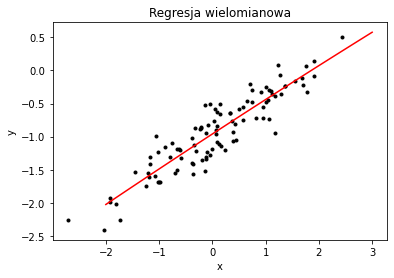

In [13]:
def draw_quadratic_curve(x, y, coefficients):
    x1 = np.linspace(-3, 3, num=50)
    
    values = coefficients[1]*x1*x1 + coefficients[0]*x1 + coefficients[2]
    
    plt.title(f'Regresja wielomianowa')
    
    plt.xlabel(f'x')
    plt.ylabel(f'y')
    
    plt.plot(x, y, '.', color='black')
    
    plt.plot(x1, values, color='red')
    
    return plt

plot = draw_quadratic_curve(x, y, result.params)
plot.show()

Na rysunku powyżej został przedstawiony wykres otrzymanej zależności wielomianowej między $x$ i $y$. Analizując wartości $R^{2}$ i $\bar{R}^{2}$ można zauważyć, że wartość pierwszego nie zmieniła się a wartość drugiego wskaźnika zmniejszyła się. Z tego wynika, że model wielomianowy (z czynnikiem kwadratowym) nie jest (w tym przypadku) lepszy niż model liniowy. W następnym kroku należało powtórzyć eksperymenty dla danych z mniejszym szumem (model pozostaje ten sam). Można to uzyskać poprzez zmniejszenie wariancji w rozkładzie normalnym, użytym do generowania wartości $\epsilon$. Oto kod odpowiedzialny za ten krok:

In [14]:
x = np.random.normal(0, 1, size=100)
print(f'Wektor x: {x}')

Wektor x: [-1.56401734 -1.68335859 -0.10006885 -0.01540289  1.37570317  0.21002242
  1.19857694  1.96057316  1.06694531  2.21769968  0.22760846  1.5643202
  0.01503743  1.73249562  0.13202056  1.07869403  0.13861563 -1.19357889
  0.64396415 -1.4931804  -0.3265794  -1.87105078  1.47859429 -0.77934927
 -0.1647223  -1.83559517 -0.7424566  -1.15455383 -1.01837675 -0.82102832
  1.40466913 -0.13294775  0.35296937  0.35308153 -0.23989854  0.49640764
  2.06035118 -1.94710574 -0.31392818  0.32347099 -1.0945565  -0.38811761
 -2.29878269 -0.88615186 -3.12351578  0.45321217  1.79099176 -1.84530028
 -0.70159097  1.44309068 -0.25819735 -2.03235007 -0.28355014  1.44414463
  0.85067644  0.51413304  1.40327724 -0.04736087  1.68076781  0.10293832
 -0.9662175  -0.10854717  1.11944486  2.05401913 -1.10630968 -1.47996921
 -1.00828839  0.54133019  0.48505189 -1.0058131  -0.97943025 -0.89169949
  0.82381478 -0.21142276  0.65260277 -0.26149915 -0.47559018 -0.05416747
  0.40308924  0.97108997  0.03333388  0.16

In [15]:
eps = np.random.normal(0, 0.1, size=100)
print(f'Wektor eps: {eps}')

Wektor eps: [ 0.08451856  0.01608359  0.10422343 -0.10237245 -0.03669985  0.07373649
  0.00945437 -0.05229159 -0.00609516 -0.04141789  0.23249951 -0.01667421
  0.18530355 -0.14157537 -0.0513855   0.0212525  -0.13407631 -0.04953857
 -0.02779892  0.038914   -0.12919322 -0.12027778 -0.04558758  0.03949112
 -0.02821373 -0.18504289 -0.03155547  0.13047634  0.05945235  0.10527502
 -0.11212198  0.01856527 -0.06283344  0.05500261 -0.11265357  0.01050048
  0.00494833  0.15089104  0.00296085  0.07149899  0.04103946  0.00287937
 -0.03151928 -0.0332851  -0.09581828  0.11293461  0.11186105  0.02093499
  0.03351666  0.11172758  0.04369008  0.00845208 -0.0593749   0.0525181
  0.07110735  0.11234061 -0.03999264  0.00753349 -0.1490452   0.11431031
  0.17507326 -0.06351279 -0.23921414  0.04549827  0.2148546  -0.09097993
 -0.01890445 -0.07244991 -0.02649302 -0.1576295   0.02376256  0.20882522
 -0.03721307  0.00490454 -0.05001201  0.21905215  0.05824102 -0.0347586
 -0.01365018 -0.20005351  0.03148321  0.0

In [16]:
y = -1 + 0.5 * x + eps
print(f'Wektor y: {y}')

Wektor y: [-1.69749012 -1.8255957  -0.94581099 -1.1100739  -0.34884826 -0.8212523
 -0.39125717 -0.07200501 -0.4726225   0.06743195 -0.65369626 -0.23451412
 -0.80717774 -0.27532756 -0.98537522 -0.43940048 -1.06476849 -1.64632801
 -0.70581685 -1.7076762  -1.29248292 -2.05580316 -0.30629044 -1.35018352
 -1.11057488 -2.10284048 -1.40278377 -1.44680057 -1.44973603 -1.30523914
 -0.40978741 -1.0479086  -0.88634875 -0.76845662 -1.23260284 -0.7412957
  0.03512392 -1.82266182 -1.15400324 -0.76676551 -1.50623879 -1.19117943
 -2.18091062 -1.47636103 -2.65757617 -0.6604593   0.00735692 -1.90171515
 -1.31727883 -0.16672708 -1.08540859 -2.00772296 -1.20114997 -0.22540958
 -0.50355442 -0.63059287 -0.33835402 -1.01614695 -0.3086613  -0.83422053
 -1.30803549 -1.11778637 -0.6794917   0.07250784 -1.33830024 -1.83096454
 -1.52304864 -0.80178482 -0.78396708 -1.66053604 -1.46595256 -1.23702453
 -0.62530568 -1.10080684 -0.72371062 -0.91169743 -1.17955407 -1.06184234
 -0.81210556 -0.71450852 -0.95184985 -0.893

Oczywiście współczynniki $\beta_{0}$ i $\beta_{1}$ są takie same jak w poprzednim przypadku (i będą takie same w następnym, trzecim przypadku). W następnym kroku narysuje wykres przedstawiający zależność $y$ i $x$:

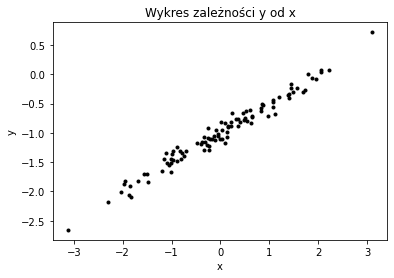

In [17]:
plt.title(f'Wykres zależności y od x')

plt.xlabel(f'x')
plt.ylabel(f'y')

plt.plot(x, y, '.', color='black')

plt.show()

Jak widać po wykresie, liniowa zależność między $y$ i $x$ jest wyraźniejsza niż w poprzednim przypadku (z większym szumem). Następnie przeprowadzimy regresję liniową i narysujemy prostą populacyjną i prostą otrzymaną w wyniku regresji:

In [20]:
x_with_constant = sm.add_constant(x)

result = my_lin_reg(y, x_with_constant)

print(f'{result.summary()}')
print(f'parameters: {result.params}')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     3223.
Date:                Sat, 19 Nov 2022   Prob (F-statistic):           8.70e-77
Time:                        18:31:18   Log-Likelihood:                 89.475
No. Observations:                 100   AIC:                            -174.9
Df Residuals:                      98   BIC:                            -169.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9974      0.010    -99.826      0.0

Jak widać po wynikach, wartości $\hat{\beta_{0}}$ i $\hat{\beta_{1}}$ są bliższe tym właściwym niż w poprzednim przypadku. Ponadto, dwie ważne miary dopasowania linii do zbioru, czyli $R^{2}$ i $\bar{R}^{2}$ również mają znacznie większe wartości niż w poprzednim przypadku. Z tego wynika, że gdy mamy dane z mniejszym szumem, to wówczas możemy oczekiwać znacznie lepszych wyników regresji. Poniżej znajduje się wykres z dwiema liniami:

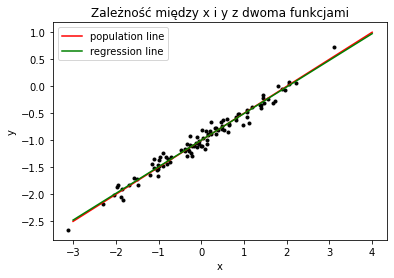

In [21]:
plot = draw_plot_with_two_lines(x, y, [-1, 0.5], result.params)
plot.show()

Na wykresie widać, że dwie wspomniane linie właściwie się ze sobą pokrywają. W następnym kroku zobaczymy co się stanie, gdy będziemy mieć więcej szumu w danych (zwiększymy wariancję w rozkładzie normalnym, użytym do generowania wartości $\epsilon$).

In [26]:
x = np.random.normal(0, 1, size=100)
print(f'Wektor x: {x}')

Wektor x: [-0.72393965  2.11152123  0.60067997 -1.20658363 -0.5624197  -0.45455794
 -0.67185926 -1.2225989   0.46329484  0.88648095 -0.40399565  0.38232594
 -0.65482795 -0.92665194 -0.22686362 -0.02521204  1.91867766  0.3253213
  0.52591083  0.47683285  1.19827586  0.66559023  0.36955104  0.37128496
 -1.39245028 -0.19608853  1.41027238  2.21526611 -1.0027613  -0.52252839
 -1.04187012 -1.87536349  0.33627407 -0.76034734 -0.45570538  0.80652847
 -0.01435151  0.37928714 -0.83125277  0.39268828  0.45263063  0.93597673
  1.24664783 -0.70454572 -0.0507749   0.98157695  0.65693948 -0.34154428
  0.37752659  0.05929814 -1.82345974  0.8861174  -0.89810146  0.12665418
 -0.11560938  2.68486903 -0.7918749  -0.09391552 -1.82305305 -1.84516678
 -0.59205261 -0.33927367  0.14081445  0.06069118 -0.21282895 -0.08182227
  0.74070728  0.16714629 -0.57426006  0.61888366 -0.99031914 -0.51564074
  1.76178304 -0.61439804  1.99891103  0.38730567 -0.10297653 -1.788405
 -0.4677924  -1.74077164 -1.44104272  1.7486

In [27]:
eps = np.random.normal(0, 0.4, size=100)
print(f'Wektor eps: {eps}')

Wektor eps: [-7.31026484e-01  1.36505562e-01 -4.15771607e-01 -8.98224222e-01
  5.65392738e-01 -2.71022137e-01 -7.54558294e-01 -6.55355600e-01
 -8.97613188e-02 -1.83830947e-01  6.28452502e-01  6.77729814e-01
 -1.93454698e-01  1.61712915e-01 -2.28204981e-01  9.33897843e-02
  2.17578781e-01 -3.01412830e-01  1.86037368e-01 -6.76194030e-01
 -4.12916947e-01  5.71717868e-02 -1.11694004e+00 -5.41776533e-01
  1.19376148e-01  1.94387266e-01  1.90811999e-01  7.04990059e-01
  1.15400881e-01  5.65451925e-01  1.19453191e-01 -2.05791056e-01
  2.52946425e-01  1.40197048e-01 -7.68138852e-01  1.35390666e-01
  7.01617752e-01 -2.52028369e-02  7.06568237e-01 -5.04656052e-01
 -3.46794835e-01  4.76122993e-01 -6.75737058e-01  4.34242956e-01
  6.79051977e-01  9.02896261e-02  3.27795438e-02  6.99373033e-02
 -3.65426358e-01  1.01964974e-01  5.20468043e-01  1.79222733e-01
 -4.06896046e-01 -6.42241455e-01 -3.79729259e-04 -7.12243408e-01
  7.17734242e-01  1.77197058e-01  4.73121447e-01 -8.16540032e-01
  7.74139340e

In [28]:
y = -1 + 0.5 * x + eps
print(f'Wektor y: {y}')

Wektor y: [-2.09299631  0.19226618 -1.11543162 -2.50151604 -0.71581711 -1.49830111
 -2.09048792 -2.26665505 -0.8581139  -0.74059047 -0.57354532 -0.13110721
 -1.52086867 -1.30161306 -1.34163679 -0.91921623  0.17691761 -1.13875218
 -0.55100722 -1.43777761 -0.81377902 -0.6100331  -1.93216452 -1.35613405
 -1.57684899 -0.903657   -0.10405181  0.81262312 -1.38597977 -0.69581227
 -1.40148187 -2.1434728  -0.57891654 -1.23997662 -1.99599154 -0.4613451
 -0.305558   -0.83555926 -0.70905815 -1.30831191 -1.12047952 -0.05588864
 -1.05241314 -0.9180299  -0.34633548 -0.4189219  -0.63875071 -1.10083484
 -1.17666306 -0.86838596 -1.39126183 -0.37771857 -1.85594678 -1.57891437
 -1.05818442 -0.36980889 -0.67820321 -0.8697607  -1.43840508 -2.73912342
 -0.52188696 -1.31664952 -0.5673328  -1.2771136  -0.62591267 -0.57784129
 -1.38163359 -0.84197811 -0.60523368 -0.43041896 -2.16359032 -1.36248036
  0.35792729 -0.25367216 -0.53638812 -0.87246074 -0.55999428 -1.72557424
 -1.02392568 -1.79106535 -2.15744688  0.40

Poniżej znajduje się wykres przedstawiający zależność między  $y$ i $x$ w nowym przypadku z większym szumem w danych:

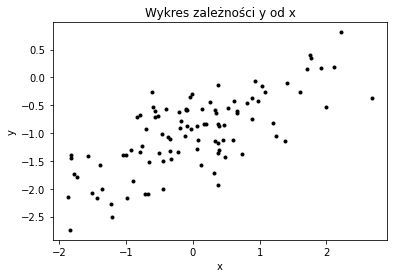

In [29]:
plt.title(f'Wykres zależności y od x')

plt.xlabel(f'x')
plt.ylabel(f'y')

plt.plot(x, y, '.', color='black')

plt.show()

Jak widać liniowa zależność między wartościami $y$ i $x$ jest już mniej widoczna, niż w dwóch poprzednich przypadkach (punkty są mniej skupione wokół pewnej prostej i są bardziej rozsiane po płaszczyźnie). W następnym kroku dokonamy regresji:

In [31]:
x_with_constant = sm.add_constant(x)

result = my_lin_reg(y, x_with_constant)

print(f'{result.summary()}')
print(f'parameters: {result.params}')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sat, 19 Nov 2022   Prob (F-statistic):           1.67e-17
Time:                        18:44:47   Log-Likelihood:                -65.310
No. Observations:                 100   AIC:                             134.6
Df Residuals:                      98   BIC:                             139.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9924      0.047    -21.129      0.0

Jak widać wartości współczynników $\hat{\beta_{0}}$ i $\hat{\beta_{1}}$ są znowu bliskie prawdziwym wartościom $\beta_{0}$ i $\beta_{1}$ ich estymacje są podobne do tych z przypadku pierwszego (jednakże estymacja $\beta_{0}$ jest znacznie lepsza). Poniżej znajduje się wykres z linią populacyjną i z linią z regresji:

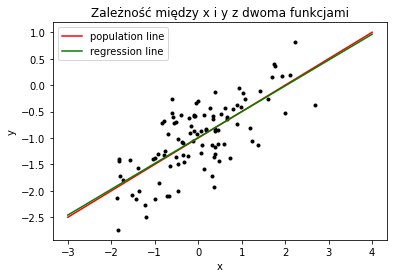

In [32]:
plot = draw_plot_with_two_lines(x, y, [-1, 0.5], result.params)
plot.show()

Jak widać, znowu dwie linie prawie się pokrywają. Jednakże widać, że dopasowanie do zbioru jest gorsze niż w poprzednich przypadkach, bo wartości $R^{2}$ i $\bar{R}^{2}$ są znacznie mniejsze (mimo, że estymacje współczynników są lepsze niż w pierwszym przypadku). Następnie należało porównać jak wyglądają przedziały pewności dla oryginalnego zbioru danych, zbioru danych z mniejszym szumem i większym szumem. Analizując otrzymane przedziały pewności można zauważyć, że im mniejszy szum w danych, tym szerokość tego przedziału jest mniejsza (tzn. dla zbioru danych z największym szumem szerokość przedziału była największa, dla zbioru danych z średnim szumem szerokość przedziału była średnia a dla zbioru danych z największym szumem szerokość tego przedziału była największa). Jest to spowodowane tym, że wraz ze wzrostem szumu w zbiorze danych, rośnie błąd standardowy estymatorów $\hat{\beta_{0}}$ oraz $\hat{\beta_{1}}$ (co wynika bezpośrednio ze wzorów na błędy standardowe dla tych estymatorów), zatem musi rosnąć ich średnie odchylenie, co bezpośrednio przekłada się na wzrost szerokości tych przedziałów (reguła trzech sigm).

### Zadanie 14

W zadaniu 14 z książki, skupiliśmy się na problemie liniowej zależności między zmiennymi. W pierwszym podpunkcie należało stworzyć 3 wektory ***x1***, ***x2*** oraz ***y***. Wektory ***x2*** i ***x1*** są powiązane następującą zależnością:
> $x_{2} = \frac{1}{2} \cdot x_{1} + \epsilon$

A wektor ***y*** jest obliczany następująco:
> $y = 2 + 2 \cdot x_{1} + 0.3 \cdot x_{2} + \epsilon$

Korzystając z zależności między $x_{2}$ oraz $x_{1}$ nasz liniowy model możemy zapisać jako:
> $y = 2 + 2.15 \cdot x_{1} + \epsilon$

Oraz możemy wyrazić nasz model w zależności tylko od $x_{2}$:
> $y = 2 + 4.3 \cdot x_{2} + \epsilon$

Za tą część odpowiada następujący kod:

In [34]:
def generate_data(number_of_samples):
    x1 = np.random.uniform(size=number_of_samples)
    x2 = 0.5*x1 + np.random.normal(size=number_of_samples) / 10
    
    y = 2 + 2*x1 + 0.3*x2 + np.random.normal(size=number_of_samples)
    
    return x1, x2, y

x1, x2, y = generate_data(100)

print(f'x1: {x1}')
print(f'x2: {x2}')
print(f'y: {y}')

x1: [0.98669683 0.00280874 0.82274495 0.70801602 0.35520636 0.84537439
 0.1016614  0.96773649 0.27468878 0.58504462 0.17356572 0.12999178
 0.18092772 0.80953105 0.9645964  0.82102779 0.14008694 0.93875525
 0.25961767 0.98816106 0.22983636 0.48167464 0.17147238 0.75718319
 0.72526771 0.52053236 0.04800854 0.95506877 0.84012832 0.38967185
 0.45352569 0.22766587 0.88728357 0.56407914 0.39499194 0.95310085
 0.2441423  0.73106365 0.47966457 0.6386402  0.48459384 0.05900388
 0.71159509 0.08591902 0.28180486 0.11135059 0.69644894 0.8792886
 0.50749248 0.11153688 0.03612164 0.81899941 0.54614269 0.28746147
 0.28824226 0.25462308 0.40567695 0.78875592 0.49499513 0.75315058
 0.25999044 0.37756417 0.92126453 0.12483157 0.09275773 0.58558874
 0.70715543 0.37507224 0.93805448 0.33017066 0.15258889 0.73300598
 0.30513275 0.22907151 0.8437863  0.21022655 0.03719153 0.54204542
 0.38534909 0.65841395 0.99865819 0.42087304 0.15617115 0.41573346
 0.52793418 0.76930584 0.29276377 0.96170411 0.7075825  0.3

Następnie należało zbadać relację między zmiennymi $x_{1}$ i $x_{2}$ oraz narysować wykres ich zależności. Oczywiście ze względu na sposób generowania wartości $x_{2}$ wiemy, że ta relacja będzie liniowa (w danych można zauważyć liniowy wzór):

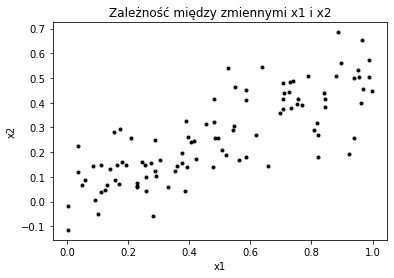

In [35]:
def plot_relation(x1, x2):
    plt.title(f'Zależność między zmiennymi x1 i x2')
    
    plt.xlabel(f'x1')
    plt.ylabel(f'x2')
    
    plt.plot(x1, x2, '.', color='black')
    
    plt.show()
    
plot_relation(x1, x2)

Jak widać powyżej w tej zależności widać liniowy wzór (między innymi). Następnie należało przeprowadzić regresję liniową na tym modelu. Za to odpowiada poniższy kod:

In [36]:
def my_linear_regression(x1, x2, y):
    number_of_samples = x1.size
    
    predictors = np.column_stack((x1, x2, np.ones(number_of_samples)))
    
    model = sm.OLS(y, predictors)
    
    results = model.fit()
    
    return results

results = my_linear_regression(x1, x2, y)

print(f'Wartości współczynników b1, b2, b0: {results.params}')
print(f'Podsumowanie: {results.summary()}')

Wartości współczynników b1, b2, b0: [ 2.25849206 -0.1338255   2.05170806]
Podsumowanie:                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     25.11
Date:                Sat, 19 Nov 2022   Prob (F-statistic):           1.63e-09
Time:                        20:22:45   Log-Likelihood:                -130.98
No. Observations:                 100   AIC:                             268.0
Df Residuals:                      97   BIC:                             275.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------

Jak widać współczynniki $\hat{\beta_{0}}$, $\hat{\beta_{1}}$ oraz $\hat{\beta_{2}}$ różnią się od prawdziwych wartości $\beta_{0}$, $\beta_{1}$ i $\beta_{2}$ (nie są tak bliskie jak w poprzednich przypadkach) i mają znacznie większe wartości błędów standardowych. Dla wartości $\beta_{1}$ *p-value* wynosi $0$, więc mogę odrzucić tezę $H_{0}: \beta_{1} = 0$, ale nie mogę odrzucić tezy $H_{0}: \beta_{2} = 0$ (bo w tym przypadku $p-value$ jest dużo większe niż powszechnie przyjęte $\alpha = 5\%$). W następnym kroku należało dokonać regresji liniowej, ale używając tylko zmiennej $x_{1}$:

In [25]:
x_with_constant = sm.add_constant(x1)

results = my_lin_reg(y, x_with_constant)

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.228
Method:                 Least Squares   F-statistic:                     30.25
Date:                Fri, 18 Nov 2022   Prob (F-statistic):           3.03e-07
Time:                        22:20:04   Log-Likelihood:                -143.68
No. Observations:                 100   AIC:                             291.4
Df Residuals:                      98   BIC:                             296.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1049      0.188     11.203      0.0

Jak widać w tym przypadku $p-value$ dla $x_{1}$ jest równe $0.000$. Z tego wynika, że mogę odrzucić teze $H_{0}: \beta_{1} = 0$. Ponadto widać, że zmalała wartość błędu standardowego dla estymatora współczynnika $\beta_{1}$.
W następnym punkcie dokonam regersji, ale biorąc jedynie $x_{2}$ jako zmienną zależną:

In [26]:
x2_with_constant = sm.add_constant(x2)

results = my_lin_reg(y, x2_with_constant)

print(f'{results.summary()}')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     27.32
Date:                Fri, 18 Nov 2022   Prob (F-statistic):           9.74e-07
Time:                        22:21:20   Log-Likelihood:                -144.83
No. Observations:                 100   AIC:                             293.7
Df Residuals:                      98   BIC:                             298.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3101      0.164     14.125      0.0

W tym przypadku widać, że $p\_value$ dla $\beta_{1}$ jest znowu równe $0.00$, czyli znowu mogę odrzucić teze, że $H_{0}: \beta_{1} = 0$. Oprócz tego znacznie wzrósł błąd standardowy estymatora wartości $\beta_{1}$. W pierwszym kroku otrzymaliśmy, że można odrzucić teze $H_{0}: \beta_{2} = 0$, a w tym punkcie otrzymaliśmy, że można odrzucić tezę, że współczynnik przy $x_{2}$ jest równy $0$. Nie stanowi to sprzeczności, ponieważ wartości $x_{2}$ są zależne od wartości $x_{1}$, zatem z wartości $x_{1}$ można *estymować* wartości $x_{2}$, więc dodanie tej zmiennej do modelu nic nie wnosi (sama w sobie może nie mieć wpływu na wynik, bo tak naprawdę jest zmienną $x_{1}$ tylko trochę przerobioną). To, że $x_{2}$ jest tak naprawdę przerobioną zmienną $x_{1}$ widać po ostatnim przykładzie, gdzie możemy odrzucić tezę, że $\beta_{1} = 0$. W następnym punkcie należało dodać do wektorów ***x1*** oraz ***x2*** pewne wartości, które traktujemy jako błędne (źle zmierzone). Za to odpowiada poniższy kod:

In [37]:
x1 = np.append(x1, 0.1)
x2 = np.append(x2, 0.8)
y = np.append(y, 6)

Następnie dokonamy regresji na nowych wektorach $x_{1}$, $x_{2}$ oraz $y$. Za to odpowiada kod umieszczony poniżej:

In [38]:
result = my_linear_regression(x1, x2, y)

print(f'Wyniki: {result.summary()}')

Wyniki:                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.308
Model:                            OLS   Adj. R-squared:                  0.294
Method:                 Least Squares   F-statistic:                     21.81
Date:                Sat, 19 Nov 2022   Prob (F-statistic):           1.47e-08
Time:                        20:50:59   Log-Likelihood:                -137.53
No. Observations:                 101   AIC:                             281.1
Df Residuals:                      98   BIC:                             288.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.3340      0.468      2.852 

Regresje tylko ze zmienną $x_{1}$ albo $x_{2}$:

In [39]:
x1_with_constant = sm.add_constant(x1)

results = my_lin_reg(y, x1_with_constant)

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     38.14
Date:                Sat, 19 Nov 2022   Prob (F-statistic):           1.46e-08
Time:                        20:52:06   Log-Likelihood:                -139.66
No. Observations:                 101   AIC:                             283.3
Df Residuals:                      99   BIC:                             288.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1661      0.188     11.525      0.0

In [40]:
x2_with_constant = sm.add_constant(x2)

results = my_lin_reg(y, x2_with_constant)

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.243
Method:                 Least Squares   F-statistic:                     33.09
Date:                Sat, 19 Nov 2022   Prob (F-statistic):           9.82e-08
Time:                        20:52:20   Log-Likelihood:                -141.56
No. Observations:                 101   AIC:                             287.1
Df Residuals:                      99   BIC:                             292.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3191      0.176     13.141      0.0

Analizując wyżej otrzymane wyniki można zauważyć, że błędy standardowe dla estymatorów wartości $\beta_{1}$ oraz $\beta_{2}$ znacznie spadły (dla estymatora $\beta_{0}$ spadek tej wartości nie był tak duży). Podobnie w dwóch następnych modelach błędy standardowe estymatora wartości $\beta_{1}$ również znacznie spadły. Dodanie tego nowego punktu spowodowało, że w pierwszym modelu wartości $R^{2}$ oraz $\hat{R}^{2}$ spadły (czyli pogorszyło się dopasowanie do danych) a dla dwóch następnych modeli można zauważyć wzrost wartości tych współczynników (czyli poprawiło się dopasowanie do danych). Poniżej narysuje wykresy zależności $x_{2}$ od $x_{1}$ z nowym punktem, wykres zależności $y$ od $x_{1}$ z nowym punktem oraz wykres zależności $y$ od $x_{2}$ (również z nowym punktem, który jest zaznaczony kolorem czerwonym).

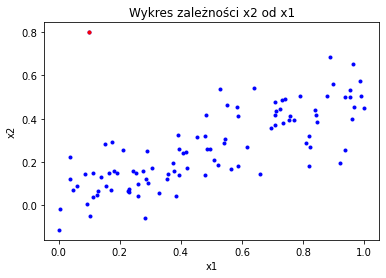

In [41]:
plt.title(f'Wykres zależności x2 od x1')

plt.xlabel(f'x1')
plt.ylabel(f'x2')

plt.plot(x1, x2, '.', color='blue')
plt.plot([0.1], [0.8], '.', color='red')

plt.show()

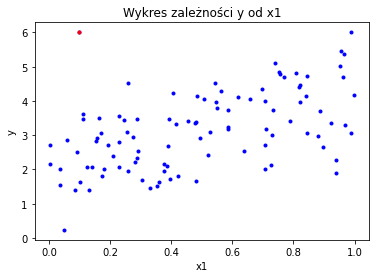

In [42]:
plt.title(f'Wykres zależności y od x1')

plt.xlabel(f'x1')
plt.ylabel(f'y')

plt.plot(x1, y, '.', color='blue')
plt.plot([0.1], [6], '.', color='red')

plt.show()

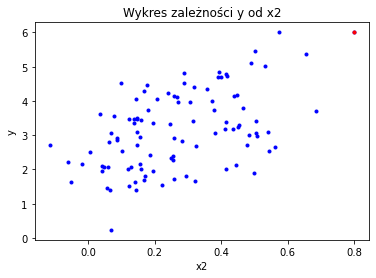

In [43]:
plt.title(f'Wykres zależności y od x2')

plt.xlabel(f'x2')
plt.ylabel(f'y')

plt.plot(x2, y, '.', color='blue')
plt.plot([0.8], [6], '.', color='red')

plt.show()

Na podstawie pierwszego wykresu można zauważyć, że nowy punkt w pierwszym modelu jest zarówno outlierem (bo dodanie go spowodowało spadek dopasowania linii z regresji do zbioru danych) i high leverage pointem bo widać, że ma nietypową wartość jeśli chodzi o zmienną $x_{2}$. W drugim przypadku, ta obserwacja nie jest ani outlierem ani high leverage pointem (wartości $x_{1}$ oraz $y$ dla tego punktu są w normie). Z kolei w trzecim modelu, ta nowa oberwacja jest high leverage pointem, bo nie ma ekstremalnej wartości $y$, ale ma esktremalną wartość $x_{2}$. Oczywiście tutaj mamy szczęście, bo mamy mało zmiennych w modelu i mamy tylko jeden predyktor, co umożliwia nam narysowanie tych wykresów i sprawdzenie czym jest właściwie dana obserwacja. Jednakże w bardziej skomplikowanych przypadkach, takie proste podejście może nie być możliwe. W takiej sytuacji do wykrywania outlierów i high leverage pointów można użyć odpowiednio wykresu residuów oraz tzw. leverage statistic (im większa wartość tego parametru, tym większa szansa na to, że dana obserwacja jest high leverage pointem).

## Zadanie 10

W zadaniu 10 należało wczytać dane z pliku *Auto.csv* jako ***dataframe*** i zmienic typ kolumny *origin* na typ *category*. Potem należało rozdzielić ten zbiór danych na zbiór treningowy i walidacyjny (przyjąłem stosunek odpowiednio $80 \%$ oraz $20 \%$). Za te kroki odpowiada poniższy kod:

In [72]:
PATH = f'Downloads/Auto.csv'

df = pd.read_csv(PATH)

df.head(n=5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


Jak widać tak prezentuje się 5 pierwszych wierszy w tabeli z danymi z rozważanego pliku. Sprawdzimy jeszcze, czy w danych nie ma pustych wartości (tzn. *null values*):

In [73]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

Jak widać, nie ma żadnych pustych wartości (zatem nie mamy brakujących obserwacji). Zmienimy teraz typ kolumny *origin* na category:

In [74]:
df = df.astype({'origin': 'category'})
print(f'Typy kolumn: {df.dtypes}')

Typy kolumn: mpg              float64
cylinders          int64
displacement     float64
horsepower        object
weight             int64
acceleration     float64
year               int64
origin          category
name              object
dtype: object


Teraz podzielimy zbiór na zbiory treningowe i walidacyjne:

In [75]:
mask = np.random.rand(len(df)) < 0.8

training_set = df[mask]
validation_set = df[~mask]

Następnie dokonam regresji liniowej na otrzymanym zbiorze danych. Moim predykatorem jest zmienna ***horsepower*** a odpowiedzią jest ***mpg***. Jednakże w kolumnie $horsepower$ znajdują się pola bez wartości. W tej sytuacji możemy ominąć te pola lub obliczyć średnią tej zmiennej dla wszystkich samochodów pochodzących z tego samego regionu. W tym przypadku wybrałem to pierwsze rozwiązanie:

In [76]:
def my_linear_regression(training_set, validation_set, model_formula, printMSE=False):
    y_train, X_train = dmatrices(model_formula, data=training_set, return_type='dataframe')
    y_valid, X_valid = dmatrices(model_formula, data=validation_set, return_type='dataframe')
    
    model = sm.OLS(y_train, X_train)
    result = model.fit()
    
    if printMSE == True:
        y_train_prediction = result.predict(X_train)
        y_valid_prediction = result.predict(X_valid)
        
        print(f'Błąd na zbiorze treningowym: {metrics.mean_squared_error(y_train, y_train_prediction)}')
        print(f'Błąd na zbiorze walidacyjnym: {metrics.mean_squared_error(y_valid, y_valid_prediction)}')
    
    return result

new_training_set = training_set.loc[training_set['horsepower'] != '?']
new_validation_set = validation_set.loc[validation_set['horsepower'] != '?']

new_training_set = new_training_set.astype({'horsepower': 'int64'})
new_validation_set = new_validation_set.astype({'horsepower': 'int64'})

result = my_linear_regression(new_training_set, new_validation_set, f'mpg ~ horsepower', True)
print(f'Podsumowanie: {result.summary()}')

Błąd na zbiorze treningowym: 25.09676897478251
Błąd na zbiorze walidacyjnym: 19.815561110469705
Podsumowanie:                             OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     449.0
Date:                Wed, 23 Nov 2022   Prob (F-statistic):           5.79e-62
Time:                        14:24:32   Log-Likelihood:                -933.33
No. Observations:                 308   AIC:                             1871.
Df Residuals:                     306   BIC:                             1878.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------

W następnym kroku należało utworzyć macierz zależności między wszystkimi zmiennymi w modelu i obliczyć macierz korelacji. Za ten krok odpowiada poniższy kod:

                   mpg  cylinders  displacement    weight  acceleration  \
mpg           1.000000  -0.776260     -0.804443 -0.831739      0.422297   
cylinders    -0.776260   1.000000      0.950920  0.897017     -0.504061   
displacement -0.804443   0.950920      1.000000  0.933104     -0.544162   
weight       -0.831739   0.897017      0.933104  1.000000     -0.419502   
acceleration  0.422297  -0.504061     -0.544162 -0.419502      1.000000   
year          0.581469  -0.346717     -0.369804 -0.307900      0.282901   

                  year  
mpg           0.581469  
cylinders    -0.346717  
displacement -0.369804  
weight       -0.307900  
acceleration  0.282901  
year          1.000000  


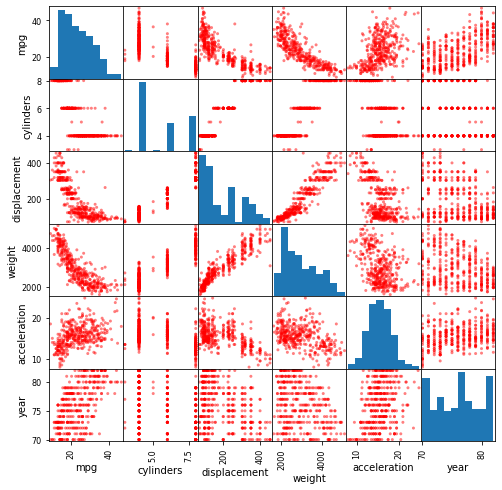

In [77]:
print(f'{df.corr()}')
axis = pd.plotting.scatter_matrix(df, color=f'red', figsize=(8, 8))

Jak widać po macierzy korelacji i otrzymanym wykresie, (niestety) zmienne nie są od siebie niezależne. Ponadto, wartości w macierzy korelacji wskazują na to, że część zmiennych jest zależna od siebie liniowo (np. ***displacement*** i ***weight***).

W następnym kroku należało przetestować modele z różnymi zmiennymi (i ich kombinacjami) jako predykatory (również należało obliczać pewne funkcje na wartościach tych zmiennych) i wykonać na tych modelach regresję. Poniżej znajdują się przetestowane przeze mnie modele:

In [78]:
models = ['mpg ~ cylinders + acceleration:year',
         'mpg ~ cylinders*acceleration*year',
         'mpg ~ cylinders + acceleration:displacement - 1',
         'mpg ~ cylinders + acceleration*displacement',
         'mpg ~ I(np.reciprocal(displacement)) + I(np.sqrt(acceleration))',
         'mpg ~ I(np.reciprocal(displacement))*I(np.sqrt(acceleration))*weight',
         'mpg ~ cylinders + acceleration + displacement + weight + origin + acceleration + year']

results_dict = dict()

for m in models:
    print(f'~~~~~ MODEL: {m} ~~~~~')
    res = my_linear_regression(training_set, validation_set, m, True)
    
    results_dict[m] = res
    
for k, v in results_dict.items():
    print(f'***** Model: {k} *****')
    print(v.summary())

~~~~~ MODEL: mpg ~ cylinders + acceleration:year ~~~~~
Błąd na zbiorze treningowym: 24.091083003456003
Błąd na zbiorze walidacyjnym: 20.126409651111118
~~~~~ MODEL: mpg ~ cylinders*acceleration*year ~~~~~
Błąd na zbiorze treningowym: 16.11968206930049
Błąd na zbiorze walidacyjnym: 17.279162552619667
~~~~~ MODEL: mpg ~ cylinders + acceleration:displacement - 1 ~~~~~
Błąd na zbiorze treningowym: 154.62654297925425
Błąd na zbiorze walidacyjnym: 131.52361091474862
~~~~~ MODEL: mpg ~ cylinders + acceleration*displacement ~~~~~
Błąd na zbiorze treningowym: 20.839643263974747
Błąd na zbiorze walidacyjnym: 16.142137792645183
~~~~~ MODEL: mpg ~ I(np.reciprocal(displacement)) + I(np.sqrt(acceleration)) ~~~~~
Błąd na zbiorze treningowym: 21.140570201489403
Błąd na zbiorze walidacyjnym: 17.501763238509557
~~~~~ MODEL: mpg ~ I(np.reciprocal(displacement))*I(np.sqrt(acceleration))*weight ~~~~~
Błąd na zbiorze treningowym: 18.346753399670384
Błąd na zbiorze walidacyjnym: 10.396839728767693
~~~~~ MODE

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     301.9
Date:                Wed, 23 Nov 2022   Prob (F-statistic):           1.68e-73
Time:                        14:24:41   Log-Likelihood:                -921.64
No. Observations:                 313   AIC:                             1849.
Df Residuals:                     310   BIC:                             1861.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

Jak widać powyżej, zaimplementowałem i przetestowałem $7$ różnych modeli, przy użyciu różnych znaków :, \*, - i różnych funkcji transformujących wektory i macierze z danymi (pierwiastek kwadratowy oraz odwrotność). Jak widać po wynikach regresji oraz wartościach w macierzy korelacji, wiele zmiennych w tym zbiorze danych jest od siebie liniowo zależnych (co stanowi problem dla regresji liniowej, choćby wtedy, gdy chcemy otrzymać dobre estymacje wartości wspólczynników). Dla każdego modelu, porównuje jego wartość $\bar{R}^{2}$ oraz błąd na zbiorze walidacyjnym. Jak widać na ostatnim modelu, w którym biorę wszystkie zmienne, błąd na zbiorze walidacyjnym jest najmniejszy (czyli estymacja błędu generalizacji) oraz wartość $\bar{R}^{2}$ jest największa (czyli mam wytłumaczoną za pomocą regresji największą część wariancji w zbiorze danych). W ostatnim kroku należało usunąć ze zbioru danych outliery i high leverage points. Outlier jest obserwacją, dla której wartość odpowiedzi $y$ jest ekstremalna (przyjmuje zaskakująco niskie lub wysokie wartości) a wartość $x$ dla tej obserwacji jest w normie. Z kolei high leverage point jest punktem, dla którego wartość $x$ przyjmuje zaskakująco niskie lub wysokie wartości. Oba punkty mają wpływ (różny) na przebieg linii najmniejszych kwadratów. Może okazać się, że dany punkt jest zarówno outlierem i high leverage pointem (szczególnie niebezpieczna kombinacja). Z tego względu przed rozpoczęciem tworzenia modeli na jakimś zbiorze danych, dobrze jest wykryć i usunąć wspomniane wyżej anomalne punkty. Do wykrywania outlierów może przydać się wykres residuów lub tzw. Z-score. Pierwszy metoda tworzy wykres wartości residuów tj. $e_{i} = y_{i} - \hat{y_{i}}$ i jeśli widzimy, że jakaś wartość $e_{i}$ znacząco odstaje od reszty wartości residuów, to możemy uznać tą wartość za outliera (w praktyce stosuje się wygodniejszą miarę, czyli wartości residuów unormowane estymacją odchylenia standardowego). Z kolei wartość $Z-score$ mówi nam o ile odchyleń standardowych jesteśmy od średniej dla danego zbioru danych (poniżej lub powyżej średniej). Typową wartością graniczną w tym przypadku jest 3 (zatem jeśli jakaś odpowiedź jest dalej niż 3 odchylenia standardowe od średniej to możemy uznać, że jest outlierem). Do wykrywania high leverage points można użyć tak zwanego $leverage-statistic$ ($h_{i} = \frac{1}{n} + \frac{(x_{i} - \bar{x})^2}{\sum_{i' = 1}^{n} (x_{i'} - \bar{x})^2}$). Duża wartość tego wskaźnika wskazuje na to, że dana obserwacja może byc high leverage pointem (z reguły jako wartość graniczną przyjmuje się $\frac{p+1}{n}$). W poniższym kodzie wykrywam i usuwam outliery i high leverage pointy:

<AxesSubplot:xlabel='Fitted values', ylabel='Normalized Residuals'>

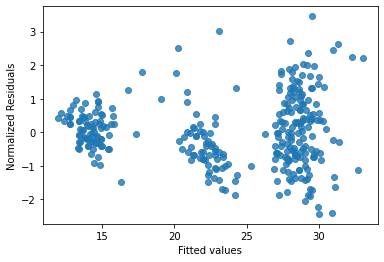

In [79]:
result = results_dict['mpg ~ cylinders + acceleration:year']

fitted_values = pd.Series(result.fittedvalues, name=f'Fitted values')
residuals = pd.Series(result.resid_pearson, name=f'Normalized Residuals')

sns.regplot(x=fitted_values, y=residuals, fit_reg=False)

<AxesSubplot:xlabel='Leverage', ylabel='Normalized Residuals'>

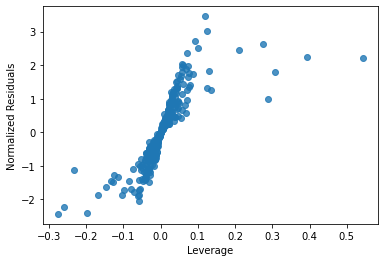

In [80]:
from statsmodels.stats.outliers_influence import OLSInfluence
leverage = pd.Series(OLSInfluence(result).influence, name = "Leverage")
sns.regplot(x=leverage, y=residuals,  fit_reg=False)

In [81]:
from scipy.stats import zscore

df['zscore'] = zscore(df.loc[:, 'acceleration'])

df['is_outlier'] = df['zscore'].apply(lambda x: x <= -3 or x >= 3)

df = df[~df['is_outlier']]

Tworzę nowy zbiór treningowy:

In [82]:
mask = np.random.rand(len(df)) < 0.8

training_set = df[mask]
validation_set = df[~mask]

Wykonuje regresję na oczyszczonych danych:

In [83]:
result = my_linear_regression(training_set, validation_set, 'mpg ~ cylinders + acceleration:year', printMSE=True)
print(f'{result.summary()}')

Błąd na zbiorze treningowym: 22.444817915661396
Błąd na zbiorze walidacyjnym: 25.32236485185661
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     264.9
Date:                Wed, 23 Nov 2022   Prob (F-statistic):           9.40e-69
Time:                        14:24:52   Log-Likelihood:                -966.70
No. Observations:                 325   AIC:                             1939.
Df Residuals:                     322   BIC:                             1951.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

Jak widać po usunięciu outlierów, otrzymałem lepsze (wyższe) wartości $R^{2}$ oraz $\bar{R^{2}}$, zatem poprawiło się dopasowanie linii najmniejszych kwadratów do zbioru danych (oraz mam mniejsze wartości błędów standardowych dla estymacji współczynników).